# Praktikum 1

In [11]:
!sudo apt install tesseract-ocr
# Perintah untuk menginstal Tesseract OCR menggunakan manajer paket APT (untuk sistem operasi berbasis Debian/Ubuntu).
!pip install pytesseract
# Perintah untuk menginstal pustaka Python pytesseract yang merupakan wrapper untuk Tesseract OCR.
!pip install opencv-python
# Perintah untuk menginstal pustaka Python OpenCV yang digunakan untuk pemrosesan gambar.


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import re
# Mengimpor modul re yang merupakan pustaka Python untuk bekerja dengan ekspresi reguler.

import cv2
# Mengimpor modul cv2 dari pustaka OpenCV yang digunakan untuk pemrosesan gambar, deteksi objek, dll.

import numpy as np
# Mengimpor modul np dari pustaka NumPy yang sering digunakan untuk manipulasi array dan operasi matematika.

import pytesseract
# Mengimpor modul pytesseract yang berfungsi sebagai wrapper untuk Tesseract OCR.

from pytesseract import Output
# Mengimpor modul Output dari pytesseract yang digunakan untuk mendapatkan output lebih rinci dari hasil Tesseract OCR.

from matplotlib import pyplot as plt
# Mengimpor modul pyplot dari pustaka Matplotlib yang digunakan untuk visualisasi data dan hasil.

In [14]:
IMG_DIR = '/content/drive/MyDrive/College/05 - Semester 5/ML/images'

In [15]:
# Fungsi untuk mengubah citra ke citra skala abu-abu (grayscale)
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Fungsi untuk menghilangkan noise pada citra dengan menggunakan median blur
def remove_noise(image):
    return cv2.medianBlur(image, 5)

# Fungsi untuk melakukan thresholding pada citra
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Fungsi untuk melakukan dilasi pada citra
def dilate(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.dilate(image, kernel, iterations=1)

# Fungsi untuk melakukan erosil pada citra
def erode(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.erode(image, kernel, iterations=1)

# Fungsi untuk melakukan operasi opening pada citra (erosi diikuti oleh dilasi)
def opening(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Fungsi untuk mendeteksi tepi citra menggunakan metode Canny
def canny(image):
    return cv2.Canny(image, 100, 200)

# Fungsi untuk koreksi kemiringan citra (deskew)
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

# Fungsi untuk mencocokkan template pada citra menggunakan metode template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

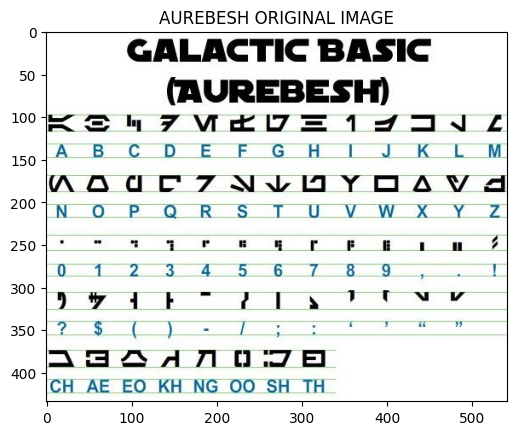

In [16]:
path_aurebesh = ('/content/drive/MyDrive/College/05 - Semester 5/ML/images/aurebesh.jpg')
image = cv2.imread(path_aurebesh)
# Memisahkan saluran warna BGR (Blue-Green-Red) menjadi saluran warna merah, hijau, dan biru
b, g, r = cv2.split(image)

# Menggabungkan saluran warna dalam urutan RGB (Red-Green-Blue)
rgb_img = cv2.merge([r, g, b])

# Menampilkan citra dalam format RGB menggunakan Matplotlib
plt.imshow(rgb_img)
# Menambahkan judul pada gambar
plt.title('AUREBESH ORIGINAL IMAGE')
# Menampilkan gambar
plt.show()

In [17]:
# Mengubah citra asli menjadi citra dalam skala abu-abu (grayscale)
gray = get_grayscale(image)

# Melakukan proses thresholding pada citra skala abu-abu
thresh = thresholding(gray)

# Melakukan operasi opening pada citra skala abu-abu
opening = opening(gray)

# Melakukan deteksi tepi pada citra skala abu-abu dengan metode Canny edge detection
canny = canny(gray)

# Menyimpan citra-citra hasil preprocessing dalam bentuk dictionary
images = {'gray': gray,  # Citra skala abu-abu
          'thresh': thresh,  # Citra hasil thresholding
          'opening': opening,  # Citra hasil operasi opening
          'canny': canny}  # Citra hasil deteksi tepi dengan metode Canny edge detection

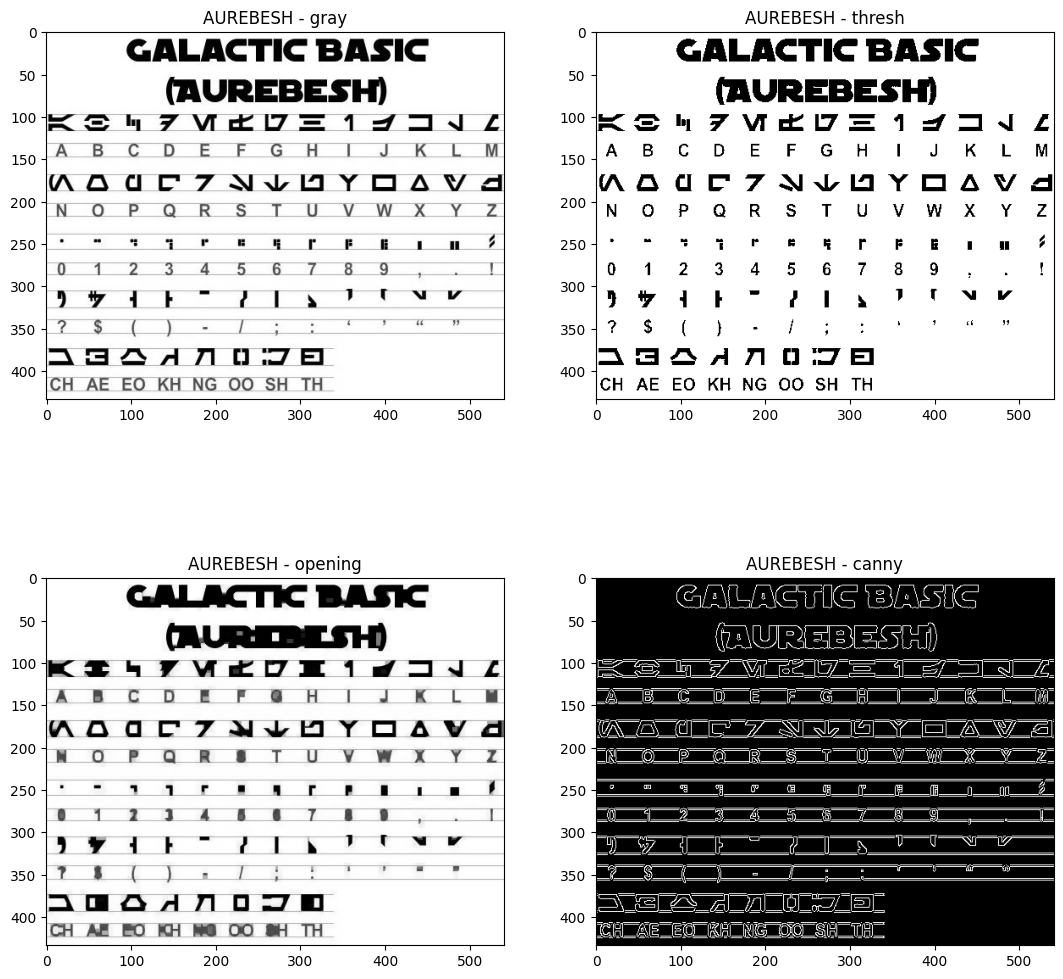

In [18]:
# Membuat figure untuk menampung gambar-gambar hasil preprocessing
fig = plt.figure(figsize=(13, 13))
ax = []

# Menentukan jumlah baris dan kolom untuk menampilkan gambar hasil preprocessing
rows = 2
columns = 2

# Mendapatkan daftar kunci (keys) dari dictionary 'images'
keys = list(images.keys())

# Melakukan iterasi untuk menampilkan gambar-gambar hasil preprocessing
for i in range(rows * columns):
    # Menambahkan subplot ke dalam figure
    ax.append(fig.add_subplot(rows, columns, i + 1))
    # Menentukan judul untuk setiap subplot
    ax[-1].set_title('AUREBESH - ' + keys[i])
    # Menampilkan gambar pada subplot menggunakan colormap 'gray'
    plt.imshow(images[keys[i]], cmap='gray')

In [19]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)

RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
Ss eg ei
ed
i a a Sy ee ee ee
st
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)

RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
Ss eg ei
ed
i a a Sy ee ee ee
st
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
GALACTIC BASIC
(AUREBESH)

RE TFVMVEVEStZIoNe
AB CD EF Ga KL
AOderT7NVYoYoOoOAVA
N_ Oo. 2 _ HG: Re SS Ty wee Ve
Ss eg ei
ed
i a a Sy ee ee ee
st
ASaSAnNADIE
CH AE EO KH NG OO SH TH


-----------------------------------------
TESSERACT OUTPUT --> CANNY EDGE IMAGE
-------

# Praktikum 2

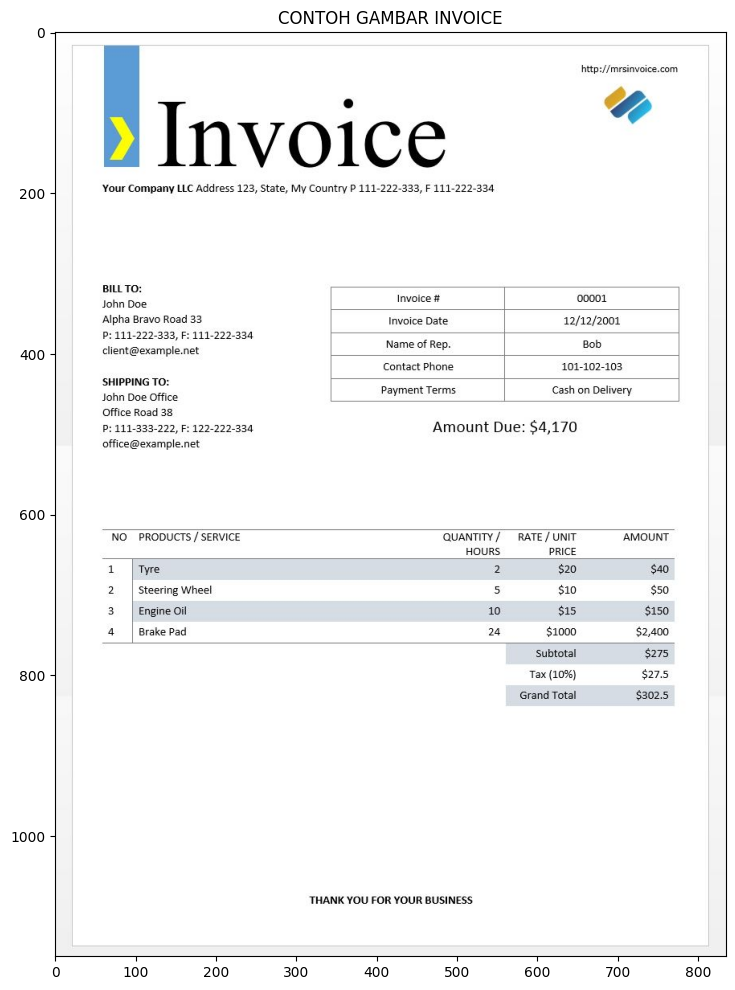

In [26]:
path_invoice = ('/content/drive/MyDrive/College/05 - Semester 5/ML/images/invoice-sample.jpg')
image = cv2.imread(path_invoice)

# Memisahkan saluran warna (blue, green, red) karena matplotlib menggunakan skema warna RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dalam ukuran tertentu
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH GAMBAR INVOICE')
plt.show()

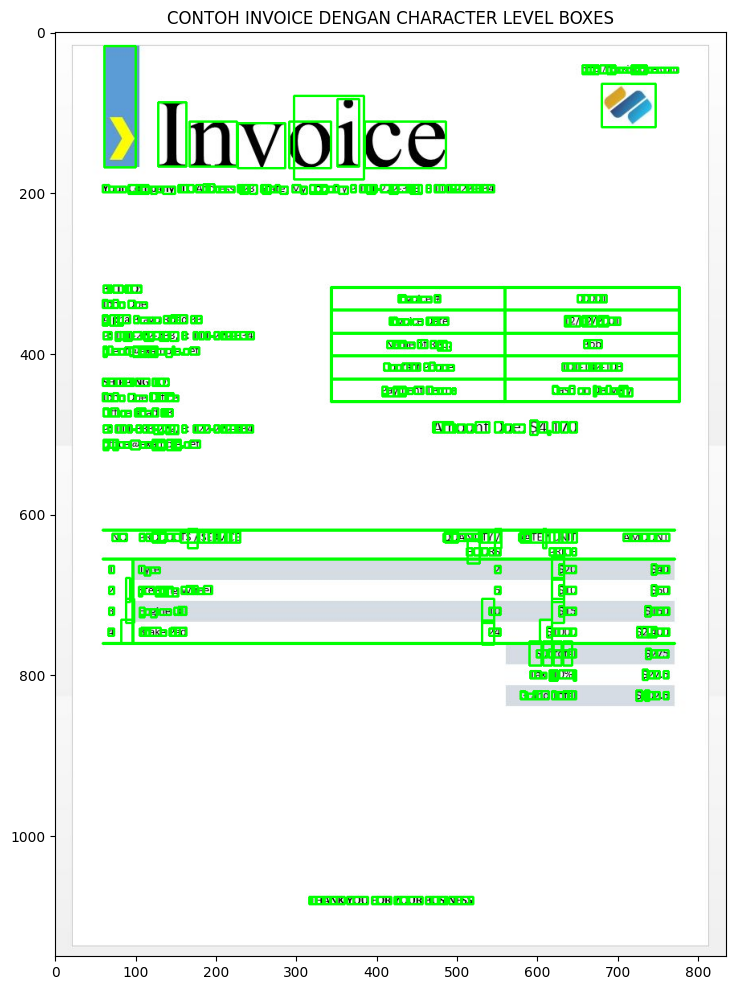

In [27]:
# Mendapatkan dimensi tinggi (h), lebar (w), dan channel warna (c) dari gambar
h, w, c = image.shape

# Menggunakan pytesseract.image_to_boxes() untuk mendapatkan informasi kotak karakter
boxes = pytesseract.image_to_boxes(image)

# Iterasi melalui setiap baris hasil dan membuat kotak pada gambar menggunakan OpenCV
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak karakter
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN CHARACTER LEVEL BOXES')
plt.show()

In [30]:
path_invoice = ('/content/drive/MyDrive/College/05 - Semester 5/ML/images/invoice-sample.jpg')
image2 = cv2.imread(path_invoice)

# Menggunakan pytesseract.image_to_data() untuk mendapatkan data teks dari gambar
d = pytesseract.image_to_data(image2, output_type=Output.DICT)

# Menampilkan kunci-kunci data yang diperoleh dari hasil OCR
print('DATA KEYS: \n', d.keys())

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


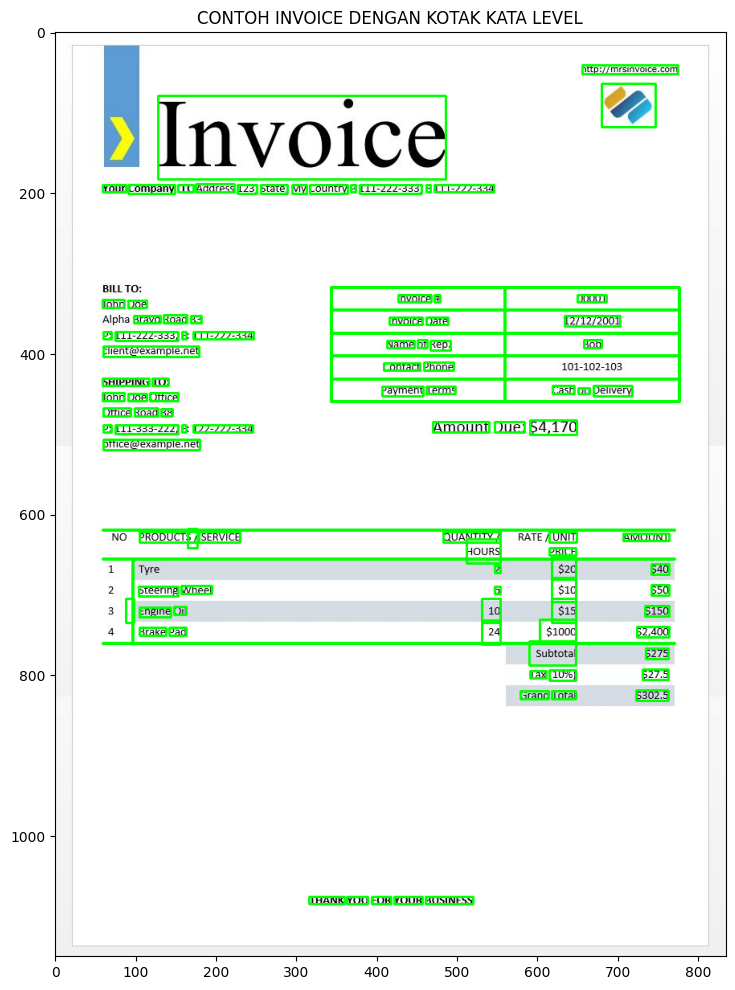

In [33]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    # Kondisi untuk hanya memilih kotak dengan kepercayaan > 60%
    if int(d['conf'][i]) > 60:
        # Mendapatkan koordinat dan ukuran kotak kata
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Membuat kotak pada gambar untuk kata dengan kepercayaan > 60%
        image3 = cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image3)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak kata berdasarkan kepercayaan > 60%
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK KATA LEVEL')
plt.show()

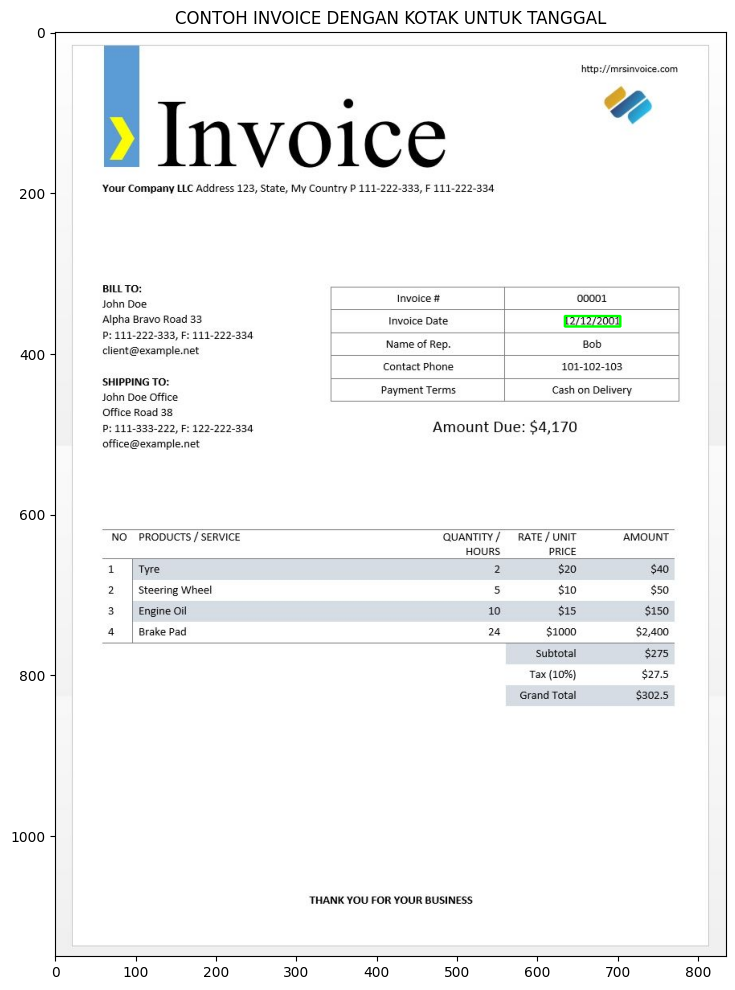

In [34]:
path_invoice = ('/content/drive/MyDrive/College/05 - Semester 5/ML/images/invoice-sample.jpg')
image4 = cv2.imread(path_invoice)

# Pola tanggal dalam format dd/mm/yyyy
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    # Memeriksa apakah kotak memiliki tingkat kepercayaan lebih dari 60%
    if int(d['conf'][i]) > 60:
        # Memeriksa apakah teks di dalam kotak sesuai dengan pola tanggal
        if re.match(date_pattern, d['text'][i]):
            # Mendapatkan koordinat dan ukuran kotak kata
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            # Membuat kotak pada gambar untuk tanggal yang sesuai dengan pola
            image5 = cv2.rectangle(image4, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image5)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak-kotak yang menandai lokasi tanggal
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK UNTUK TANGGAL')
plt.show()

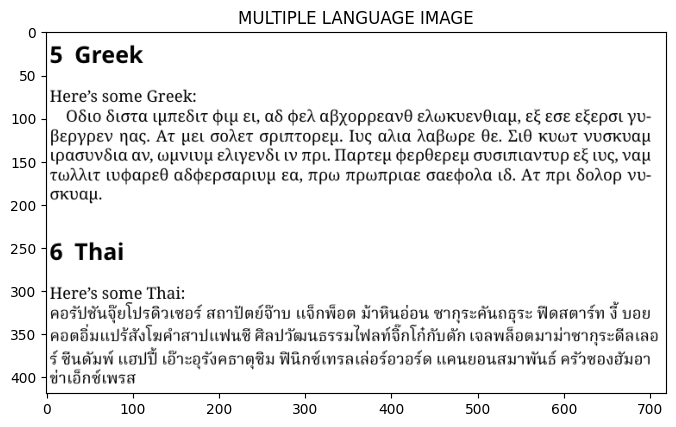

In [37]:
path_thai = ('/content/drive/MyDrive/College/05 - Semester 5/ML/images/greek-thai.png')
imageThai = cv2.imread(path_thai)
# Memisahkan channel warna untuk mengonversi dari BGR ke RGB

b, g, r = cv2.split(imageThai)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar asli
plt.figure(figsize=(8, 16))
plt.imshow(rgb_img, cmap='gray')
plt.title('MULTIPLE LANGUAGE IMAGE')
plt.show()

In [39]:
# Output dengan hanya bahasa Inggris yang ditentukan

# Konfigurasi khusus dengan hanya bahasa Inggris yang diatur
custom_config = r'-l eng --oem 3 --psm 6'

# Menggunakan pytesseract.image_to_string() untuk mendapatkan teks dari gambar dengan konfigurasi khusus
print(pytesseract.image_to_string(imageThai, config=custom_config))

5 Greek
Here’s some Greek:

OSto Stota tuMedit Huy et, aS ea aByoppeave edAwkvevOuay, e§ ece efepot yu-
Bepypev nas. AT Wel GoAET apiTtopen. Tug aAta AaBwpe Ve. LO KUWT VUoKLaL
(paovvéia av, WUVLUU eAtyevil tv mpL TMaptep bepSepey GvaTLAaVTUp e€€ LUG, Va
TWAALT LUdaped ASdepoapluy Ea, TOW TpwTplae Gaedoda 16. AT mpt SoAop vv-
oxvau.

6 Thai

Here’s some Thai: .
aosUsugulushawos amiaddw usntioa sinfudou winszduagss Haaonsn 3 vos
Aonduusaladrawunud AavTausssulwavianlAdudn wandoamnsiwinsedataa
$ Guduvi woud rvaseasiadu Windinsadosor0sa uausouanrwus aswouduer
didadinsa

